In [4]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import operator
from collections import defaultdict
import math
%matplotlib inline

In [5]:
#reading the file
df = pd.read_csv("NCWIT-TrackingToolData-Scrubbed.csv")
df.head(100)

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Record#,CIP# Only,Major Program Name,Degree Level,NCWIT Participant,Institution,What degrees does your institution offer?,School Year,When do students typically declare their major?,"Enroll, Female: Avg. ACT Math Score (Enrl F)",...,Nonresident Alien (Min. M).1,Race/Ethnicity Unknown (Min. M).1,Nonresident Alien (Min. F).2,Race/Ethnicity Unknown (Min. F).2,Nonresident Alien (Min. M).2,Race/Ethnicity Unknown (Min. M).2,Nonresident Alien (Tot. F),Race/Ethnicity Unknown (Tot. F),Nonresident Alien (Tot. M),Race/Ethnicity Unknown (Tot. M)
0,1978,14.1000,Electrical Engineering,Bachelor's,"Extension Services, Academic Alliance",263,"Bachelor's, master's, and Ph.D. degrees",2013-2014,Upon Enrollment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2034,14.1000,Electrical Engineering,Bachelor's,"Extension Services, Academic Alliance",263,"Bachelor's, master's, and Ph.D. degrees",2014-2015,Upon Enrollment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1980,11.0103,Information Technology,Bachelor's,"Extension Services, Academic Alliance",263,"Bachelor's, master's, and Ph.D. degrees",2013-2014,Upon Enrollment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2035,11.0103,Information Technology,Bachelor's,"Extension Services, Academic Alliance",263,"Bachelor's, master's, and Ph.D. degrees",2014-2015,Upon Enrollment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1981,14.0903,Software Engineering,Bachelor's,"Extension Services, Academic Alliance",263,"Bachelor's, master's, and Ph.D. degrees",2013-2014,Upon Enrollment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2031,14.0903,Software Engineering,Bachelor's,"Extension Services, Academic Alliance",263,"Bachelor's, master's, and Ph.D. degrees",2014-2015,Upon Enrollment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1952,11.0700,Computer Science,Bachelor's,"Extension Services, Academic Alliance",117,"Bachelor's, master's, and Ph.D. degrees",2007-2008,Upon Enrollment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1953,11.0700,Computer Science,Bachelor's,"Extension Services, Academic Alliance",117,"Bachelor's, master's, and Ph.D. degrees",2008-2009,Upon Enrollment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1954,11.0700,Computer Science,Bachelor's,"Extension Services, Academic Alliance",117,"Bachelor's, master's, and Ph.D. degrees",2009-2010,Upon Enrollment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1955,11.0700,Computer Science,Bachelor's,"Extension Services, Academic Alliance",117,"Bachelor's, master's, and Ph.D. degrees",2010-2011,Upon Enrollment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
number_records = len(df)
number_records

2913

<h2>CPI cleaning and Visualization </h2>

In [6]:
list(set(df["CIP# Only"]))
#so it has a mix of string and float

['11.9900',
 '27.0300',
 '11.0700',
 '14.2700',
 '11.0703',
 '14.1900',
 11.07,
 14.09,
 11.0103,
 14.02,
 11.0703,
 11.0702,
 14.19,
 14.1,
 14.27,
 15.0,
 14.08,
 '11.1000',
 '26.1100',
 27.03,
 11.1001,
 '11.0702',
 '14.0200',
 '52.1200',
 '27.0100',
 '11.0104',
 '11.0900',
 '14.0100',
 '14.4500',
 '13.0100',
 '14.0700',
 '14.1800',
 '15.0100',
 11.1006,
 52.12,
 '11.1003',
 11.05,
 '15.0303',
 '14.0800',
 11.0199,
 11.01,
 11.1,
 '15.0000',
 '11.0200',
 11.0104,
 '14.1000',
 11.02,
 '11.0100',
 '11.0801',
 11.08,
 '11.0199',
 14.0903,
 14.01,
 '14.0000',
 '12.0100',
 '11.0500',
 '15.0600',
 '11.0103',
 '14.3600',
 '11.0800',
 '16.0100',
 '11.0802',
 '14.0903',
 '14.0900',
 '11.0400',
 '11.1002',
 '11.1006',
 '?']

In [7]:
df = df[df["CIP# Only"] != '?']

for i,row in df.iterrows():
    df.set_value(i,"CIP# Only",format(float(row["CIP# Only"]),'0.4f'))


df["CIP# Only"]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


0       14.1000
1       14.1000
2       11.0103
3       11.0103
4       14.0903
5       14.0903
6       11.0700
7       11.0700
8       11.0700
9       11.0700
10      11.0700
11      11.0700
12      11.0700
13      11.0700
14      14.2700
15      14.2700
16      14.2700
17      14.2700
18      14.2700
19      14.2700
20      14.2700
21      14.2700
22      14.1000
23      14.1000
24      14.1000
25      14.1000
26      14.1000
27      14.1000
28      14.1000
29      14.1000
         ...   
2883    11.0700
2884    11.0700
2885    11.0700
2886    11.0700
2887    11.0700
2888    11.0700
2889    11.0700
2890    11.0700
2891    11.0700
2892    11.0700
2893    11.0700
2894    11.0700
2895    14.0900
2896    14.0900
2897    14.0900
2898    14.0900
2899    14.0900
2900    14.0900
2901    11.0500
2902    11.0500
2903    11.0500
2904    11.0500
2905    11.0500
2906    11.0500
2907    11.0700
2908    11.0700
2909    11.0700
2910    11.0700
2911    11.0700
2912    11.0700
Name: CIP# Only, Length:

In [8]:
# data cleaning of string and floats in cpi

_cpi = set(df["CIP# Only"])
_cpi

{'11.0100',
 '11.0103',
 '11.0104',
 '11.0199',
 '11.0200',
 '11.0400',
 '11.0500',
 '11.0700',
 '11.0702',
 '11.0703',
 '11.0800',
 '11.0801',
 '11.0802',
 '11.0900',
 '11.1000',
 '11.1001',
 '11.1002',
 '11.1003',
 '11.1006',
 '11.9900',
 '12.0100',
 '13.0100',
 '14.0000',
 '14.0100',
 '14.0200',
 '14.0700',
 '14.0800',
 '14.0900',
 '14.0903',
 '14.1000',
 '14.1800',
 '14.1900',
 '14.2700',
 '14.3600',
 '14.4500',
 '15.0000',
 '15.0100',
 '15.0303',
 '15.0600',
 '16.0100',
 '26.1100',
 '27.0100',
 '27.0300',
 '52.1200'}

In [9]:
no_cip = len(_cpi)
no_cip

44

In [10]:
#Counting for every cpi
cip_counter = Counter(df["CIP# Only"])
cip_counter.items()
l = sorted(cip_counter.items(), key=operator.itemgetter(1),reverse=True)
x = list()
y = list()
for _x,_y in l:
    x.append(_x)
    y.append(_y)

Text(0.5,0,'Top 20 CPI')

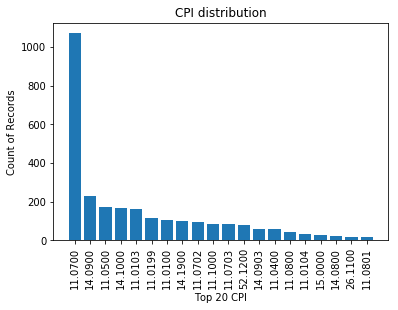

In [11]:
y_val = range(0,len(cip_counter))
plt.title("CPI distribution")
plt.bar(y_val[:20],y[:20])
plt.xticks(y_val[:20], x[:20],rotation=90)
plt.ylabel("Count of Records")
plt.xlabel("Top 20 CPI")

<h3> Binning on GPA </h3>
<p> 1. Binning based on high school gpa </p>

In [12]:
df.columns

Index(['Record#', 'CIP# Only', 'Major Program Name', 'Degree Level',
       'NCWIT Participant', 'Institution',
       'What degrees does your institution offer?', 'School Year',
       'When do students typically declare their major?',
       'Enroll, Female: Avg. ACT Math Score (Enrl F)',
       ...
       'Nonresident Alien (Min. M).1', 'Race/Ethnicity Unknown (Min. M).1',
       'Nonresident Alien (Min. F).2', 'Race/Ethnicity Unknown (Min. F).2',
       'Nonresident Alien (Min. M).2', 'Race/Ethnicity Unknown (Min. M).2',
       'Nonresident Alien (Tot. F)', 'Race/Ethnicity Unknown (Tot. F)',
       'Nonresident Alien (Tot. M)', 'Race/Ethnicity Unknown (Tot. M)'],
      dtype='object', length=269)

In [58]:
hs_gpa = defaultdict(lambda : defaultdict(lambda: defaultdict(list)))

for i,row in df.iterrows():
    #Freshman 
    #Male
    if not math.isnan(row["Freshmen, Male: Cumulative GPA (Fshm M)"]):
        hs_gpa["freshman"]["male"][format(row["Enroll, Male: Average HS GPA (Enrl M)"],"0.1f")].append(row["Freshmen, Male: Cumulative GPA (Fshm M)"])
    else:
        pass
#         print("Encountered nan")
    #Female
    if not math.isnan(row["Freshmen, Female: Cumulative GPA (Fshm F)"]):
        hs_gpa["freshman"]["female"][format(row["Enroll, Female: Average HS GPA (Enrl F)"],"0.1f")].append(row["Freshmen, Female: Cumulative GPA (Fshm F)"])
    else:
        pass
#         print("Encountered nan")

    #Sophomore
    #male
    if not math.isnan(row["Freshmen, Male: Cumulative GPA (Fshm M)"]):
        hs_gpa["sophomore"]["male"][format(row["Enroll, Male: Average HS GPA (Enrl M)"],"0.1f")].append(row["Freshmen, Male: Cumulative GPA (Fshm M)"])
    else:
        pass
    #female
    if not math.isnan(row["Sophomores, Male: Cumulative GPA (Sph. M)"]):
        hs_gpa["sophomore"]["female"][format(row["Enroll, Female: Average HS GPA (Enrl F)"],"0.1f")].append(row["Sophomores, Male: Cumulative GPA (Sph. M)"])
    else:
        pass
hs_gpa

defaultdict(<function __main__.<lambda>>,
            {'freshman': defaultdict(<function __main__.<lambda>.<locals>.<lambda>>,
                         {'female': defaultdict(list,
                                      {'2.3': [2.34],
                                       '2.5': [2.11],
                                       '2.8': [2.71, 2.3, 2.76],
                                       '3.0': [2.37, 2.85, 2.83, 2.14, 2.29],
                                       '3.1': [2.6056, 2.22, 2.33, 2.18, 3.21],
                                       '3.2': [3.01,
                                        1.7,
                                        2.52,
                                        2.46,
                                        2.79,
                                        2.42,
                                        2.74],
                                       '3.3': [1.91,
                                        1.9,
                                        1.704,
              

In [62]:
avg_hs_gpa = defaultdict(lambda : defaultdict(lambda: defaultdict(dict)))
for _,k in enumerate(hs_gpa.keys()):#level of study
    for _,j in enumerate(hs_gpa[k].keys()): #level of sex
        for _,i in enumerate(hs_gpa[k][j].keys()): #level of hs_gpa
            avg_hs_gpa[k][j][i]= {'avg': np.round(np.average(hs_gpa[k][j][i]),2), 'std': np.round(np.std(hs_gpa[k][j][i]))}

In [63]:
avg_hs_gpa

defaultdict(<function __main__.<lambda>>,
            {'freshman': defaultdict(<function __main__.<lambda>.<locals>.<lambda>>,
                         {'female': defaultdict(dict,
                                      {'2.3': {'avg': 2.3399999999999999,
                                        'std': 0.0},
                                       '2.5': {'avg': 2.1099999999999999,
                                        'std': 0.0},
                                       '2.8': {'avg': 2.5899999999999999,
                                        'std': 0.0},
                                       '3.0': {'avg': 2.5, 'std': 0.0},
                                       '3.1': {'avg': 2.5099999999999998,
                                        'std': 0.0},
                                       '3.2': {'avg': 2.52, 'std': 0.0},
                                       '3.3': {'avg': 2.5499999999999998,
                                        'std': 1.0},
                                       

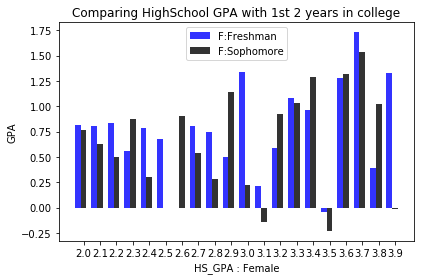

In [97]:
#setting up the bar plot only for females
_hs_gpa = np.arange(2.0,4.0,0.1)
f_score = [float(x)-avg_hs_gpa["freshman"]["female"][x]['avg'] for x in avg_hs_gpa["freshman"]["female"]]
s_score = [float(x)-avg_hs_gpa["sophomore"]["female"][x]['avg'] for x in avg_hs_gpa["sophomore"]["female"]]
s_score = s_score[1:]


#ploting
# data to plot
n_groups = len(_hs_gpa)
# means_frank = (90, 55, 40, 65)
# means_guido = (85, 62, 54, 20)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, f_score, bar_width,
                 alpha=opacity,
                 color='b',
                 label='F:Freshman')
 
rects2 = plt.bar(index + bar_width, s_score, bar_width,
                 alpha=opacity,
                 color='',
                 label='F:Sophomore')

plt.xlabel('HS_GPA : Female')
plt.ylabel('GPA')
plt.title('Comparing HighSchool GPA with 1st 2 years in college')
plt.xticks(index + bar_width, _hs_gpa)
plt.legend()
 
plt.tight_layout()
plt.show()

In [98]:
f_score = [float(x)-avg_hs_gpa["freshman"]["female"][x]['avg'] for x in avg_hs_gpa["freshman"]["female"]]
s_score = [float(x)-avg_hs_gpa["sophomore"]["female"][x]['avg'] for x in avg_hs_gpa["sophomore"]["female"]]

In [95]:
fscore = list()
for i,x in enumerate(avg_hs_gpa["freshman"]["female"]):
    print(_hs_gpa[i],x)
    if(_hs_gpa[i]==x):
        fscore.append(avg_hs_gpa["freshman"]["female"][x]['avg'])
    else:
        fscore.append(0)

2.3 3.9
2.4 3.7
2.5 3.5
2.6 3.4
2.7 3.6
2.8 3.2
2.9 nan
3.0 3.8
3.1 3.3
3.2 3.0
3.3 4.1
3.4 2.8
3.5 3.1
3.6 4.0
3.7 4.2
3.8 2.3
3.9 4.5
4.0 4.6
4.1 2.5
4.2 4.3


In [92]:
fscore

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [10]:
inst = Counter(df["Institution"])

In [13]:
sorted_inst = sorted(inst.items(), key=operator.itemgetter(1),reverse=True)

In [16]:
sorted_inst

[(110, 87),
 (270, 63),
 (13, 62),
 (216, 54),
 (487, 54),
 (424, 54),
 (114, 48),
 (262, 47),
 (320, 47),
 (75, 44),
 (373, 42),
 (72, 42),
 (287, 42),
 (233, 40),
 (82, 38),
 (194, 37),
 (144, 36),
 (330, 36),
 (64, 35),
 (499, 34),
 (295, 33),
 (189, 32),
 (453, 32),
 (117, 31),
 (319, 31),
 (435, 30),
 (85, 27),
 (47, 27),
 (182, 27),
 (157, 27),
 (32, 26),
 (351, 26),
 (369, 26),
 (430, 26),
 (367, 25),
 (469, 25),
 (395, 24),
 (379, 24),
 (179, 24),
 (291, 24),
 (361, 24),
 (299, 24),
 (146, 23),
 (368, 23),
 (236, 22),
 (88, 22),
 (422, 22),
 (40, 21),
 (302, 21),
 (158, 21),
 (388, 20),
 (97, 20),
 (205, 18),
 (489, 18),
 (238, 18),
 (65, 18),
 (381, 18),
 (115, 17),
 (109, 17),
 (143, 17),
 (21, 16),
 (397, 16),
 (54, 16),
 (224, 16),
 (345, 16),
 (250, 16),
 (25, 16),
 (133, 16),
 (337, 16),
 (26, 16),
 (497, 16),
 (37, 16),
 (200, 15),
 (9, 15),
 (333, 14),
 (346, 14),
 (324, 14),
 (217, 13),
 (68, 13),
 (412, 13),
 (112, 12),
 (160, 12),
 (475, 12),
 (392, 12),
 (41, 12),
 

In [29]:
_inst_not_null = defaultdict(int)
for i,row in df.iterrows():
    if not (math.isnan(row["Enroll, Female: Average HS GPA (Enrl F)"])  or math.isnan(row["Freshmen, Female: Cumulative GPA (Fshm F)"]) or math.isnan(row["Sophomores, Female: Cumulative GPA (Sph. F)"]) or math.isnan(row["Juniors, Female: Cumulative GPA (Jun. F)"]) or math.isnan(row["Seniors, Female: Cumulative GPA (Sen. F)"])):
        _inst_not_null[row["Institution"]] +=1

In [30]:
_inst_not_null = sorted(_inst_not_null.items(), key=operator.itemgetter(1),reverse=True)

In [31]:
_inst_not_null

[(487, 48),
 (287, 29),
 (13, 25),
 (194, 21),
 (182, 20),
 (373, 19),
 (319, 18),
 (115, 15),
 (85, 14),
 (489, 12),
 (157, 12),
 (324, 12),
 (361, 11),
 (249, 10),
 (205, 9),
 (6, 7),
 (64, 7),
 (123, 6),
 (238, 5),
 (146, 5),
 (46, 4),
 (29, 4),
 (83, 4),
 (38, 4),
 (54, 2),
 (388, 2),
 (200, 1),
 (72, 1),
 (88, 1),
 (128, 1),
 (75, 1)]